# Assignment - 8

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)







## Import Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import itertools as it

In [2]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


## Tasks, Part 1
-------------------------
1. Find the linear regression equation for mileage vs price.

In [6]:
X_train = df.Mileage.values.reshape(-1,1)
Y_train = df.Price

# Linear Equation:
reg_LR = LinearRegression()
reg_LR.fit(X_train, Y_train)

Y_predict = reg_LR.predict(X_train)

2. Chart the original data and the equation on the chart.

Text(0.5, 1.0, 'Mileage vs Price')

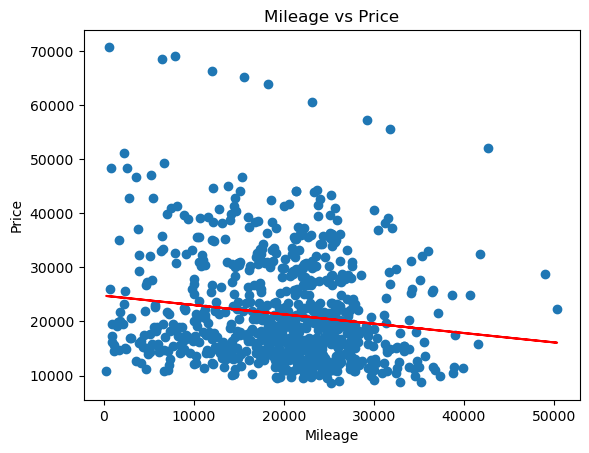

In [10]:
plt.scatter(x=X_train, y=Y_train)
plt.plot(X_train, Y_predict, color='red')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [8]:
reg_LR.score(X_train, Y_train)

0.02046344732348926

## Tasks, Part 2
-----------------
1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [55]:
X_train = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
Y_train = df.Price

# Linear Equation:
reg_LR = LinearRegression()
reg_LR.fit(X_train, Y_train)

Y_predict = reg_LR.predict(X_train)

2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [52]:
reg_LR.score(X_train, Y_train)

0.446264353672838

3. Find the combination of the factors that is the best predictor for price.

In [56]:
col_combos = []

for i in range(len(X_train.columns)):
    col_combos += list(it.combinations(X_train.columns, i+1))

def reg_score(input_cols):
    X_train = df[list(input_cols)]
    Y_train = df.Price

    # Linear Equation:
    reg_LR = LinearRegression()
    reg_LR.fit(X_train, Y_train)
    return reg_LR.score(X_train, Y_train)

In [57]:
max_score = 0
trains = []
for i in col_combos:
    score = reg_score(i)
    if max_score < score:
        trains = []
        max_score = score
        trains += list(i)
    print(i, reg_score(i))

('Mileage',) 0.02046344732348926
('Cylinder',) 0.32385903759512247
('Liter',) 0.31152674427904514
('Doors',) 0.019251466591467037
('Cruise',) 0.1856330092969275
('Sound',) 0.015462387624189389
('Leather',) 0.024710851264124534
('Mileage', 'Cylinder') 0.33982070826367505
('Mileage', 'Liter') 0.3291279066854156
('Mileage', 'Doors') 0.04039914867118721
('Mileage', 'Cruise') 0.20931385583158602
('Mileage', 'Sound') 0.036881215967350056
('Mileage', 'Leather') 0.04521956340886857
('Cylinder', 'Liter') 0.32591551601566593
('Cylinder', 'Doors') 0.343460536583038
('Cylinder', 'Cruise') 0.3839491324027344
('Cylinder', 'Sound') 0.32927527347959384
('Cylinder', 'Leather') 0.33698000644980586
('Liter', 'Doors') 0.3205156407766834
('Liter', 'Cruise') 0.3680458490296845
('Liter', 'Sound') 0.31926427639502897
('Liter', 'Leather') 0.32337917189904175
('Doors', 'Cruise') 0.1996382468921617
('Doors', 'Sound') 0.0370162877090342
('Doors', 'Leather') 0.04141817346866039
('Cruise', 'Sound') 0.19288948066869

In [58]:
print(trains, max_score) # Best R2 Score

['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 0.446264353672838


## Tasks, Hard Mode
--------------------
1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [59]:
X_train = df[['Make', 'Model', 'Type']]
X_train = pd.get_dummies(X_train)
Y_train = df.Price.values.reshape(-1,1)

# Linear Equation:
reg_LR = LinearRegression()
reg_LR.fit(X_train, Y_train)

Y_predict = reg_LR.predict(X_train)

In [60]:
reg_LR.score(X_train, Y_train) # R2 Score is high, means fit is good.

0.9584648879374322

2. Find the best combination of factors to predict price.

In [ ]:
col_combos = []

for i in range(len(X_train.columns)):
    col_combos += list(it.combinations(X_train.columns, i+1))

def reg_score(input_cols):
    X_train = df[list(input_cols)]
    Y_train = df.Price

    # Linear Equation:
    reg_LR = LinearRegression()
    reg_LR.fit(X_train, Y_train)
    return reg_LR.score(X_train, Y_train)

In [ ]:
max_score = 0
trains = []
for i in col_combos:
    score = reg_score(i)
    if max_score < score:
        trains = []
        max_score = score
        trains += list(i)
    print(i, reg_score(i))